# Translations

In this notebook, the NN learns how to essentially take two numbers and add them.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import torch
import torch.nn as nn
from torch.autograd import Variable

cmap=plt.cm.tab10
c = cycler('color', cmap(np.linspace(0,1,10)))
plt.rcParams["axes.prop_cycle"] = c
plt.style.use('ggplot')

#%config InlineBackend.figure_format = 'retina'

%matplotlib notebook
%matplotlib notebook

In [8]:
%matplotlib notebook

In [162]:
class Translations(nn.Module):
    def __init__(self):
        super(Translations, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(2,2,bias=False),
            nn.LeakyReLU(),
            nn.Linear(2,1,bias=False))
        
    def forward(self, x):
        out = self.layer1(x)
        return out

In [163]:
model = Translations()
model.cuda()
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
total_loss = []

In [164]:
model

Translations(
  (layer1): Sequential(
    (0): Linear(in_features=2, out_features=2)
    (1): LeakyReLU(0.01)
    (2): Linear(in_features=2, out_features=1)
  )
)

In [165]:
num_samples = 5000
for k in range(num_samples):
    
    # ===================data prep===================
    data   = Variable(torch.randn(2))
    target = data[0] + data[1]
    data, target = data.cuda(), target.cuda()
    
    # ===================forward=====================
    output = model(data)
    loss   = criterion(output, target)

    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # ===================log========================
    total_loss.append(loss.data[0])
    if (k+1)%(num_samples//10)==0:
        print('[{}] loss:{:.3f}, diff:{:.3f} '
              .format(k+1, total_loss[-1], np.abs(target.data[0]-output.data[0])))
    

[500] loss:1.687, diff:1.299 
[1000] loss:0.258, diff:0.508 
[1500] loss:0.025, diff:0.158 
[2000] loss:0.009, diff:0.093 
[2500] loss:0.001, diff:0.036 
[3000] loss:0.002, diff:0.048 
[3500] loss:0.013, diff:0.112 
[4000] loss:0.000, diff:0.003 
[4500] loss:0.000, diff:0.001 
[5000] loss:0.000, diff:0.000 


In [167]:
y = []
x = np.linspace(-10,10)

for k in x:
    
    mynumber = np.array([k,1])
    data1   = Variable(torch.from_numpy(mynumber)).type(torch.cuda.FloatTensor)
    target = data1[0] + data1[1]

    output = model(data1)
    y.append(output.data[0])


<IPython.core.display.Javascript object>


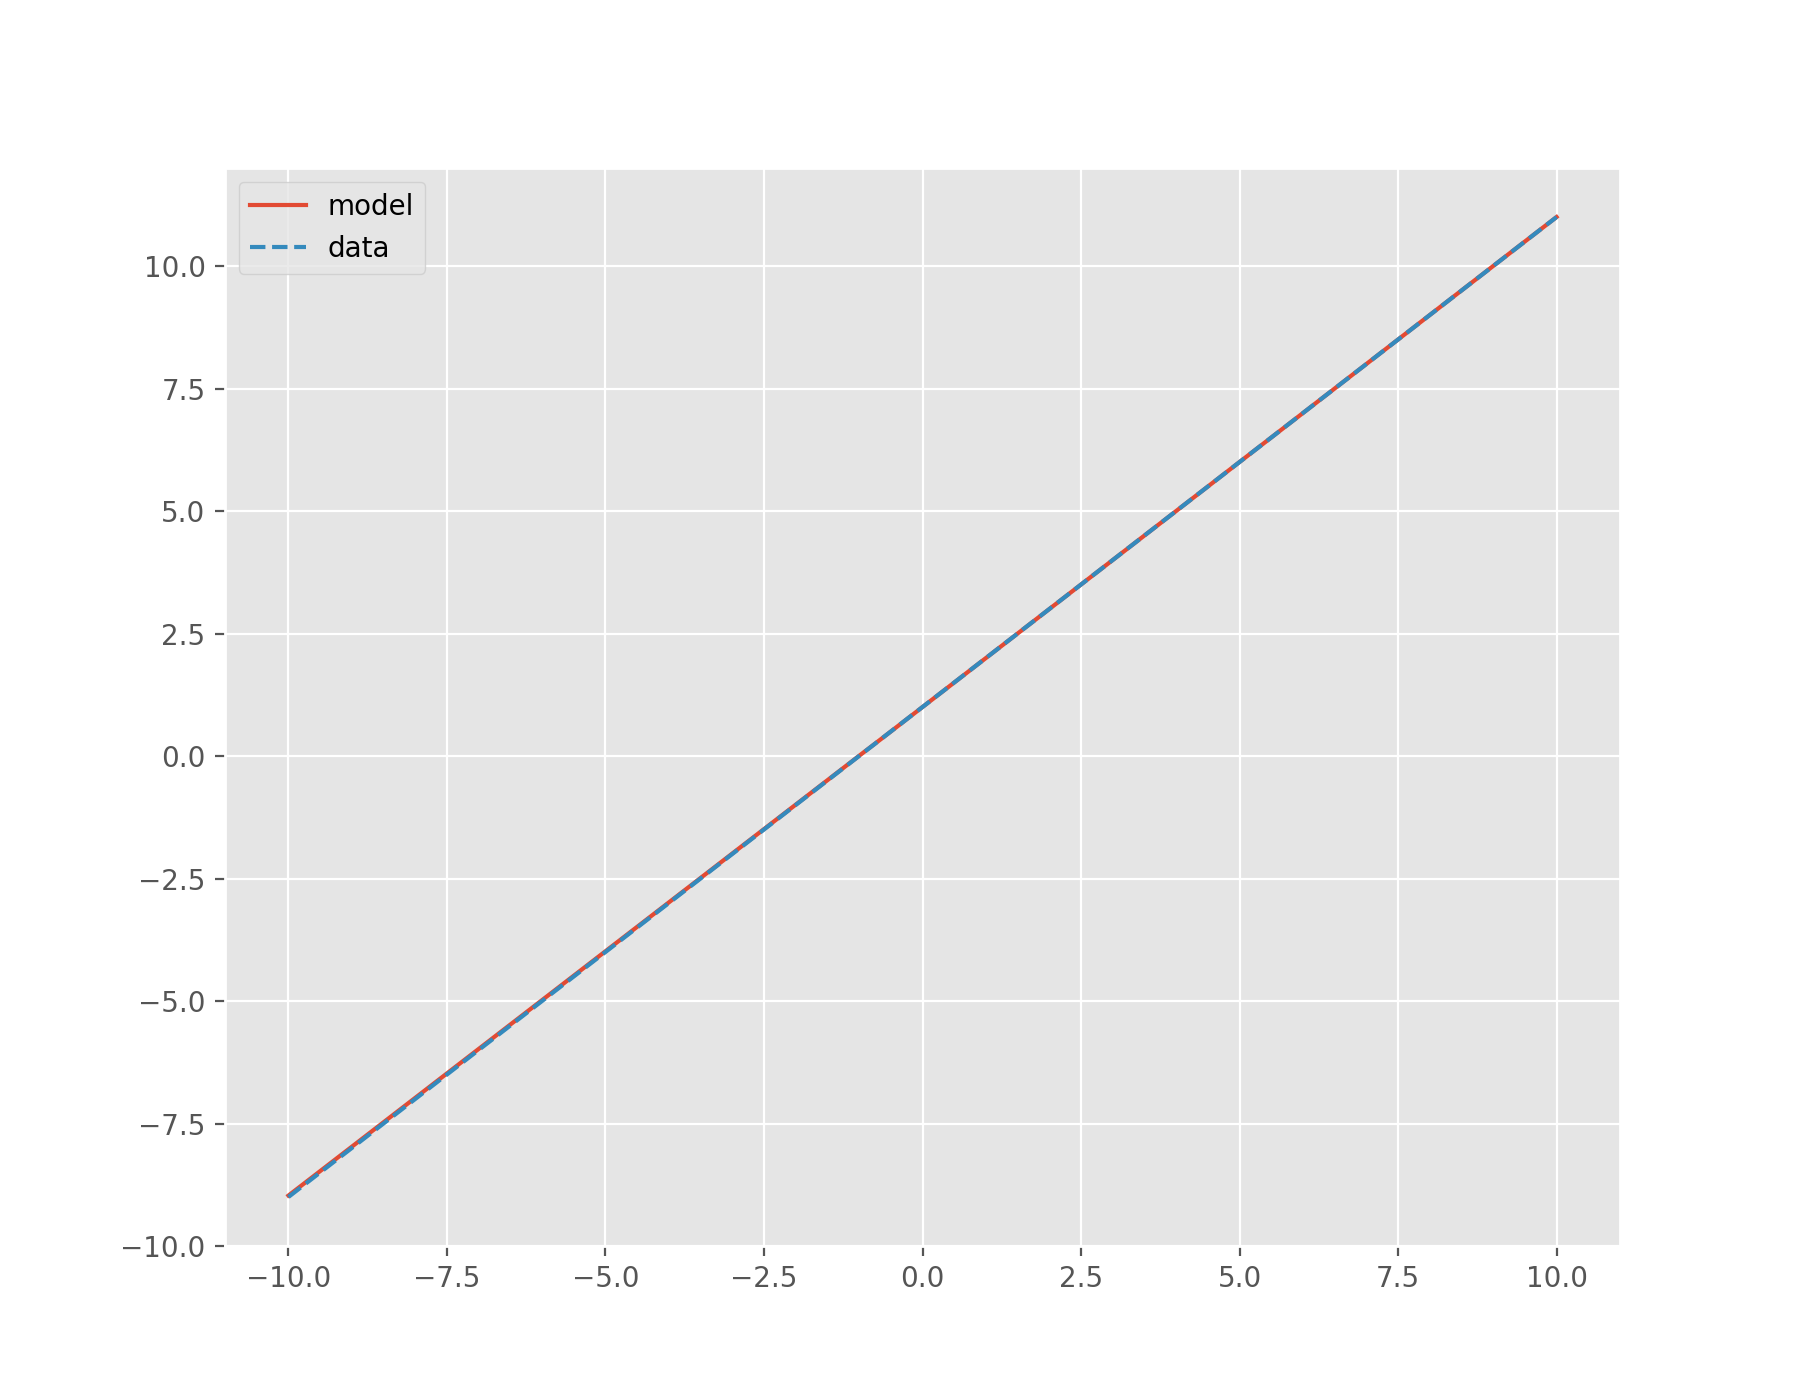

In [168]:
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(x,y, label='model')
ax.plot(x,x+1, label='data',ls='--')
ax.legend();

In [169]:
list(model.parameters())

[Parameter containing:
  0.9807  0.9805
 -0.9739 -0.9783
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], Parameter containing:
  1.0097 -1.0138
 [torch.cuda.FloatTensor of size 1x2 (GPU 0)]]

In [170]:
W = np.array(list(model.parameters())[0].data)
x = np.array(list(model.parameters())[1].data)

In [171]:
W

array([[ 0.98072165,  0.9804764 ],
       [-0.97389966, -0.9782865 ]], dtype=float32)

In [172]:
x

array([[ 1.0097116, -1.0137945]], dtype=float32)